In [1]:
ls

drive/  sample_data/


In [2]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions




**Eğitilmiş modelin indirilmesi**

In [3]:
model = VGG16(weights = 'imagenet', include_top=True)

553467096/553467096 [==============================] - 15s 0us/step


**Model yapısına bakalım, katmanlara ve özelliklerine göz atalım**

In [4]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

**Toplam parametre sayısı**

In [5]:
model.count_params()

138357544

In [7]:
 import os
 os.chdir("/content/drive/MyDrive/Colab Notebooks/images")

In [8]:
ls

betty.jpg  f16.jpg  inek.jpg  olips3.jpeg  olips.jpeg  README.md  van-kedisi.jpg


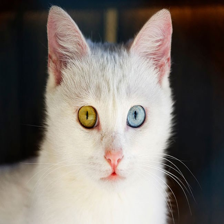

In [22]:
image_path = 'van-kedisi.jpg'
image = Image.open(image_path)
image = image.resize((224,224))
image

In [23]:
x= np.array(image, dtype= 'float32') #görüntüyü diziye çevirir.
x= np.expand_dims(x, axis=0) #dizi listesine çevirir.
x =preprocess_input(x) #üstteki preproses işlemleri yapılmış görüntüyi inputa alma

In [24]:
preds = model.predict(x)
print('predicted: ', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 18ms/step
predicted:  [('n02124075', 'Egyptian_cat', 0.468505), ('n02127052', 'lynx', 0.15575387), ('n02123045', 'tabby', 0.047087967)]
Egyptian_cat
